1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

The global minima of this funcion are 2:
x1: 0.08997401317178881   x2: -0.08997402787046727 
y1: -0.712637731065672    y2: 0.7126377170510481 

their value at these points are: 
z1: -1.0316283802422204   z2: -1.0316283802206798
**************************************************

when the initial guess is (0,0) the function is null:
x0: 0.0 
y0: 0.0 
z0: 0.0


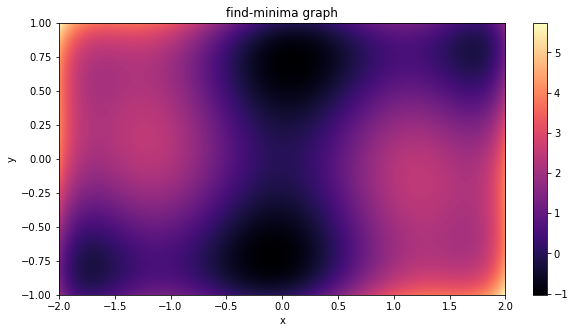

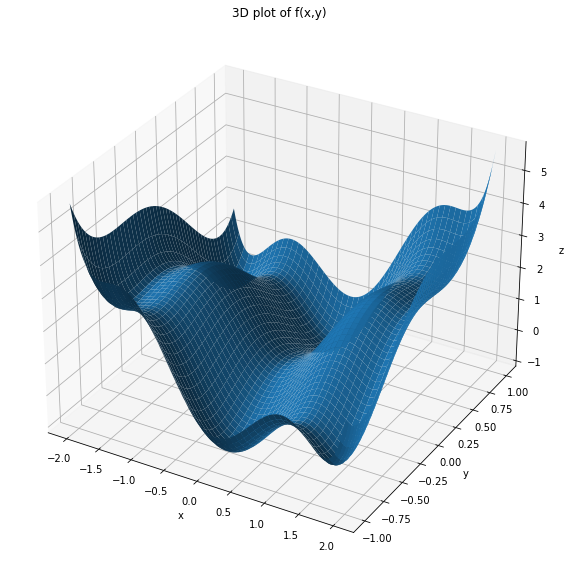

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.colors import BoundaryNorm

%matplotlib inline

def f(x):
    return((4 - (2.1*x[0]**2) + (x[0]**4)/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2)


x = np.linspace(-2,2,500)
y = np.linspace(-1,1,500)

X, Y = np.meshgrid(x, y)
data = f([X,Y])

# create the figure
fig = plt.figure(figsize=(10,5))

# show the reference image
ax1 = fig.add_subplot(111)
ax1.imshow(data, cmap='magma', aspect='auto', extent=[-2,2,-1,1]) 
norm = plt.Normalize(data.min(), data.max())
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('find-minima graph')
plt.show


#Z = f([X, Y])
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, data, label='f(x,y)=(4−2.1𝑥2+𝑥43)𝑥2+𝑥𝑦+(4𝑦2−4)𝑦2')
ax._facecolors2d = ax._facecolor
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D plot of f(x,y)')


#1-st point
solution1 = optimize.minimize(f,(0.,-0.75), method='SLSQP')
solution2 = optimize.minimize(f,(0.,0.75), method='SLSQP')

print("The global minima of this funcion are 2:")
print("x1:", solution1.x[0], "  x2:", solution2.x[0], "\ny1:", solution1.x[1], "   y2:", solution2.x[1],"\n\ntheir value at these points are:", "\nz1:", solution1.fun, "  z2:", solution2.fun)

#what happens for initial guess (0,0)
solution0 = optimize.minimize(f, (0,0), method = 'SLSQP')
print("**************************************************\n\nwhen the initial guess is (0,0) the function is null:\nx0:", solution0.x[0], "\ny0:", solution0.x[1], "\nz0:", solution0.fun )


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

parameters for max temperatures:

covariance matrix:
 [[ 1.32869164e+00 -1.60429943e-03 -1.01483031e-01 -1.08343090e+00]
 [-1.60429943e-03  6.31514977e-03  2.12240611e-04  1.91655238e-03]
 [-1.01483031e-01  2.12240611e-04  2.75445201e-02  1.70938409e-01]
 [-1.08343090e+00  1.91655238e-03  1.70938409e-01  1.38436206e+00]]

A =     23.09 +- 1.15
mu =     6.74 +- 0.08
sigma = -2.29 +- 0.17
d =     15.78 +- 1.18

*************

parameters for min temperature:

covariance matrix:
 [[ 1.96936334e+00 -8.73505377e-04 -2.27187222e-02 -1.05130446e+00]
 [-8.73505377e-04  2.22850010e-03  4.92554460e-05  1.09101927e-03]
 [-2.27187222e-02  4.92554460e-05  5.77327417e-03  7.06520192e-02]
 [-1.05130446e+00  1.09101927e-03  7.06520192e-02  1.41330833e+00]]

A =     52.65 +- 1.40
mu =     7.16 +- 0.05
sigma = -1.98 +- 0.08
d =    -61.32 +- 1.19


Text(0.5, 1.0, 'Temperatures in Alaska')

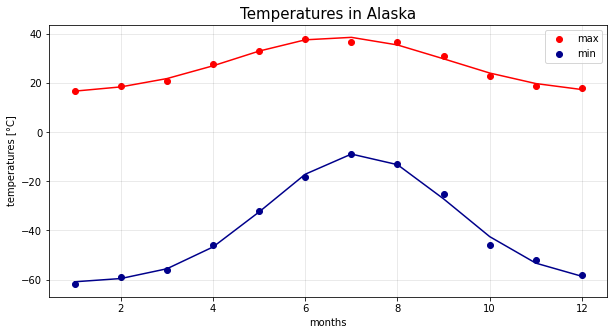

In [2]:
T_max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
T_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

x_data = np.linspace(1, 12, num=12)
fig = plt.figure(figsize=(10,5))
plt.scatter(x_data, T_max, label='max', c='red')
plt.scatter(x_data, T_min, label='min', c='darkblue')
plt.legend()

def gaussiana(x, A,mu,sigma,d):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))+d


popt_max, pcov_max = optimize.curve_fit(gaussiana, x_data, T_max)
popt_min, pcov_min = optimize.curve_fit(gaussiana, x_data, T_min)


print("parameters for max temperatures:\n")
print("covariance matrix:\n", pcov_max)
print("\nA =     %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("mu =     %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("sigma = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("d =     %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))

print("\n*************\n")

print("parameters for min temperature:\n")
print("covariance matrix:\n", pcov_min)
print("\nA =     %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("mu =     %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("sigma = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("d =    %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))


#vengono valori negativi per gli errori suiparametri<--- da capire se è effettivamente giusto

f3 = gaussiana(x_data,popt_max[0],popt_max[1],popt_max[2],popt_max[3])
f4 = gaussiana(x_data,popt_min[0],popt_min[1],popt_min[2],popt_min[3])

plt.plot(x_data,f3,c='red')
plt.plot(x_data,f4,c='darkblue')
plt.xlabel('months')
plt.ylabel('temperatures [°C]')
plt.grid(color='black', alpha=.1)
plt.title('Temperatures in Alaska', fontsize=15)


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [ ]:
import pickle
import pandas as pd
  
#first point
arr = np.load('residuals_261.npy', allow_pickle = True)
df = pd.DataFrame( data = arr.item(0))
df2 = df[(df['residuals']>-1.5)&(df['residuals']<1.5)]


fig,ax=plt.subplots(2,1,figsize=(20,10))  #define figure

ax[0].hist(x=df['residuals'], bins = 'auto', range=[-10,1.5],  alpha=0.7) #original histo
ax[0].set_title('original histogram of residuals',fontsize=20)
ax[0].grid(True)

histo,bin_edges,g = ax[1].hist(x=df2['residuals'], bins = 100, range=[-1.5,1.5], alpha=0.5, ec="black") #the significant part
ax[1].set_title('significant histogram of residuals', fontsize=20)

#second point
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
l=[]
for i in histo:
    l.append((i)**0.5)
err=np.array(l)   

ax[1].errorbar(bin_centres, histo, yerr=err, fmt=".", capsize=3)
ax[1].set_ylabel("N")
ax[1].grid(True)


#third point     
def gaussiana(x, A, mu, sigma, d):
    
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + d

coeff, var_matrix = optimize.curve_fit(gaussiana, bin_centres, histo)

f_histo = gaussiana(bin_centres, coeff[0],coeff[1],coeff[2],coeff[3])
print("\nA:",coeff[0],"\nmu:",coeff[1],"\nsigma:",coeff[2],"\nd:",coeff[3])

ax[1].plot(bin_centres,f_histo, linewidth=1.5, c='red', label='fitted function')
ax[1].legend()


#4-th point
from scipy import stats
ndof = len(bin_centres) - 4
print("\n********************************\nn degrees of freedom =", ndof)

# calculate the chi^2
chi2 = np.sum(((histo - gaussiana(bin_centres,*coeff))**2) / (np.abs(histo)))
print("chi2 =", chi2)

# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue, "\nthe  p-value is < 0.05, null hypothesis has to be rejected, the fit is considered unsatisfactory\n")

ssr = np.sum(((histo - f_histo))**2)
tss = np.sum((np.mean(histo) - histo)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) 
print("Correlation coefficient is close to 1, if 1 gaussian fits percfectly data")


A: 475.1335343024155 
mu: -0.08632785909265608 
sigma: 0.20893692930970667 
d: 19.80321250186905

********************************
n degrees of freedom = 96
chi2 = 1217.069827531187
p-value = 0.0 
the  p-value is < 0.05, null hypothesis has to be rejected, the fit is considered unsatisfactory

R2 = 0.986281893486256 
R = 0.9931172606929435
Covariance matrix:
 [[1. 1.]
 [1. 1.]]
Correlation coefficient is close to 1, if 1 gaussian fits percfectly data


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?  <-------------MANCA QUESTO

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [ ]:
data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame( data = data, columns = ['time','temperature'])
df2 = df[(df['time'] > 2008) & (df['time'] < 2013)]
df2 = df2[df2['temperature'] < 50]
df2 = df2[df2['temperature'] > -50]

#first part
fig,ax=plt.subplots(1,2,figsize=(15,5))

def f(t,a,b,c):
    return a*np.cos(2*np.pi*t+b)+c

ax[0].scatter(df2['time'],df2['temperature'], label='data', alpha=0.3)

coeff, cov_matx = optimize.curve_fit(f, df2['time'] , df2['temperature'])

fitted_curve = f(df2['time'], *coeff)
ax[0].plot(df2['time'],fitted_curve, label='f ( t, a, b, c )', c='darkorange', linewidth=3)


print("best fit-values for f(x):","\na:", coeff[0],"+-",cov_matx[0,0], "\nb:",coeff[1],"+-",cov_matx[1,1], "\nc: ", coeff[2],"+-",cov_matx[2,2])
print("\nmean temperature: ",np.mean(df['temperature']))
ax[0].axhline(np.mean(df['temperature']), color='r', label='mean temperature: 8.94°C')
ax[0].legend()


#second part
def g(x,a,b,c,d):
    return a*np.cos(2*np.pi*b*x+c)+d

coeff2, cov_matx2 = optimize.curve_fit(g, df2['time'] , df2['temperature'])
print("\n**************************\nbest fit-values for g(x):","\na:", coeff2[0],"+-",cov_matx2[0,0], "\nb:",coeff2[1],"+-",cov_matx2[1,1], "\nc:", coeff2[2],"+-",cov_matx2[2,2], "\nd", coeff2[3],"+-",cov_matx2[3,3])
fitted_curve2 = g(df2['time'], *coeff2)

ax[1].scatter(df2['time'],df2['temperature'], label='data', alpha=0.3)
ax[1].plot(df2['time'],fitted_curve2, label='g ( t, a, b, c, d )', c='darkorange', linewidth=3)
ax[1].axhline(np.mean(df['temperature']), color='r', label='mean temperature: 8.94°C')

ax[1].legend()

#RSS of f(x)
print("\nEstimators for f(x):")
ssr_f = np.sum((fitted_curve-df2['temperature'])**2)
ndoff=3-1
print("ssr_f =", ssr_f, "\nndof =", ndoff)

#RSS of g(x)
print("\nEstimators for g(x):")
ssr_g = np.sum((fitted_curve2-df2['temperature'])**2)
ndofg = 4-1 
print("ssr_g =", ssr_g, "\nndof = ", ndofg)



#F-Fisher test

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

cl_f_vs_g = Ftest(ssr_f, ssr_g, ndoff, ndofg, len(df2['time']), verbose=True)

print("The parameter b is a phase that shifts x-axes, so it is proportional to time. It doesn't have any physical sense since it depends when we start sampling the data.")



In [ ]:
#definition of winter: from 15th of December (0.9568) to 15th of March (0.1998)
#definition of summer: from 15th of June (0.4482) to 15th of September (0.6966)
temp_hot = []
temp_cold = []
#time_cold = []
for i in range(2008,2012):
    
    df_hot = df2[(df2['time'] > i+0.4482)&(df2['time'] < i+0.6993)]  
    temp_hot.append( f(df_hot['time'], coeff[0],coeff[1],coeff[2]))

    
for i in range(2009,2011):
    
    df_cold = df2[(df2['time'] > i+0.9568) & (df2['time'] < (i+1+0.2025))]
    temp_cold.append(f(df_cold['time'], coeff[0],coeff[1],coeff[2]))
        


print("The avarage temperature for summer is:", np.mean(temp_hot),"°C.")
print("The avarage temperature for winter is:", np.mean(temp_cold),"°C.")

